
**Problem Statment**:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.



## Step 1: Reading and Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [151]:
#Importing the libraries

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

pd.set_option('display.max_columns', 400)

In [152]:
# Read the given CSV file, and view some sample records

bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [153]:
#Determining the number of rows and columns
bike.shape

(730, 16)

In [154]:
#summary of all the numeric columns
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [155]:
#Datatypes of each column
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [156]:
#Checking missing values
bike.isnull().sum()


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### From above we can see there are no missing values in dataset

In [157]:
#Renaming the columns
bike.rename(columns = {'yr':'Year','mnth':'month','hum':'humidity','cnt':'count'}, inplace = True) 
bike.head()

#Mapping variables season, month, weathersit, weekday

bike['season']=bike.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
bike['month']=bike.month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bike['weathersit']=bike.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
bike['weekday']=bike.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

bike.head()

,instant,dteday,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Step 2: Data Visualisation

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns

### Identify Continuous and Categorical Features

In [159]:
#Checking the unique values in the data
bike.nunique().sort_values()

Year            2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
month          12
temp          498
humidity      594
casual        605
windspeed     649
registered    678
atemp         689
count         695
instant       730
dteday        730
dtype: int64

### Visualising Numeric Variables

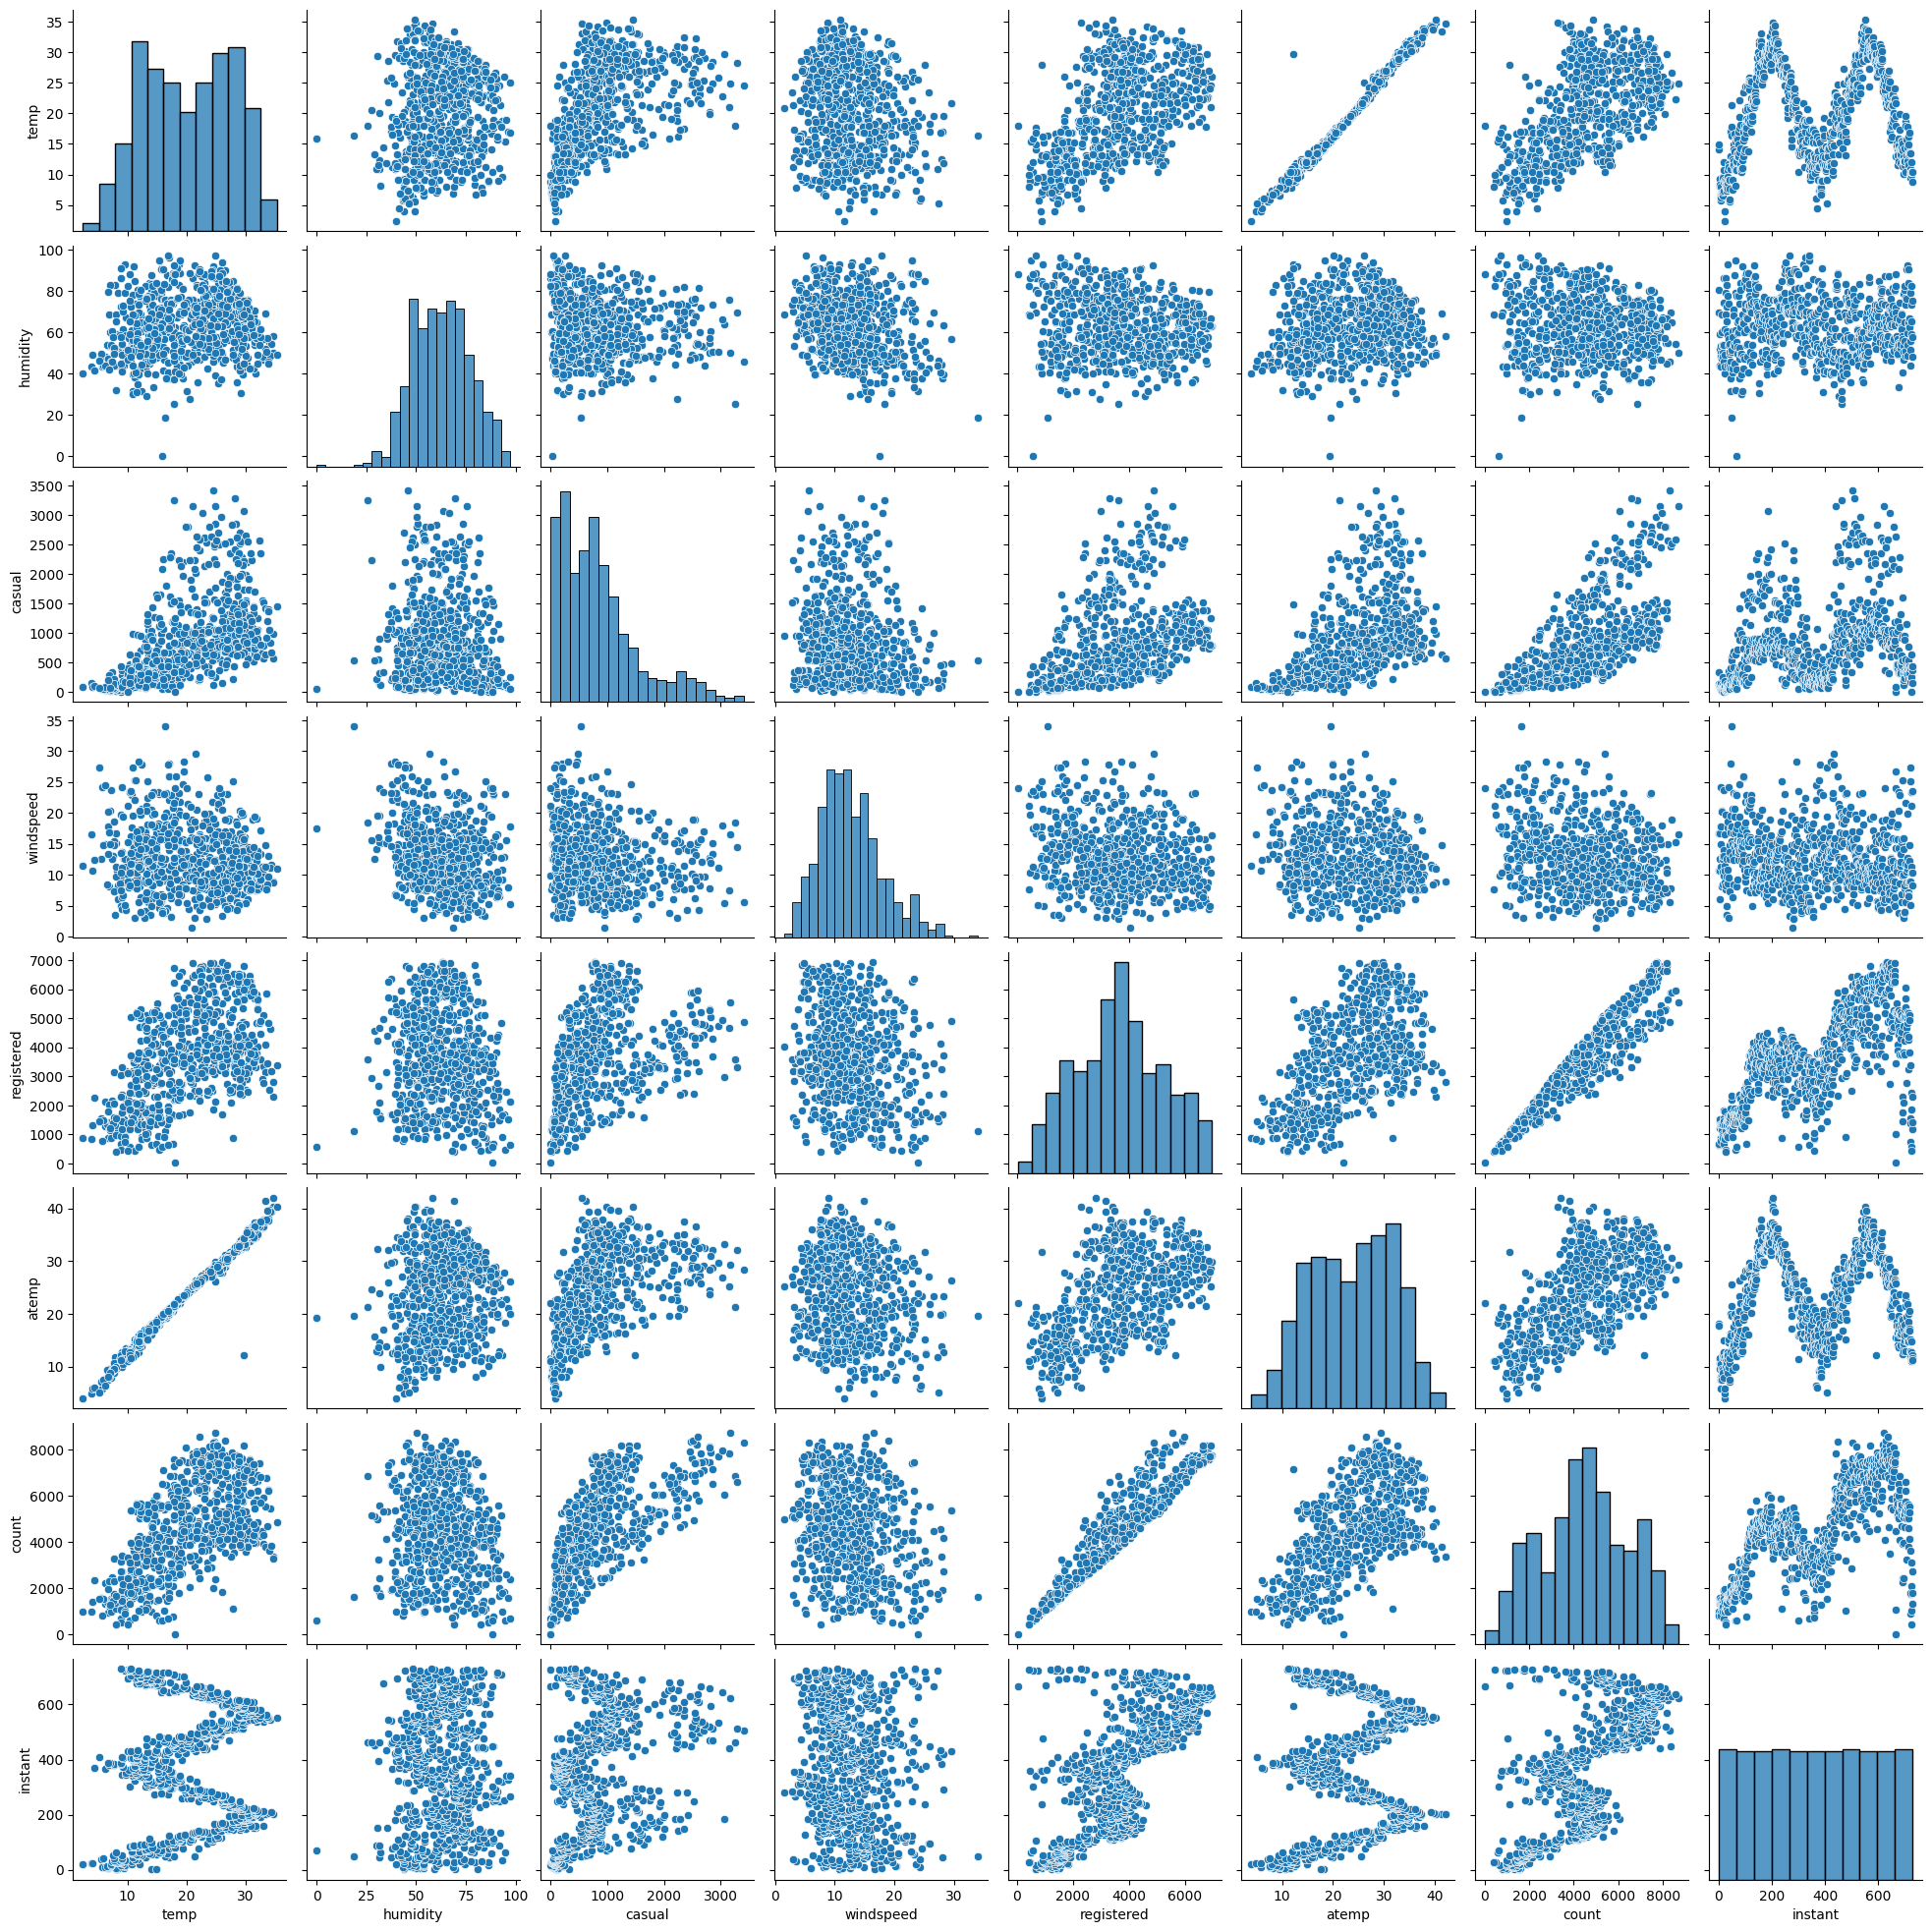

In [160]:
#Pairplot for numeric variables
sns.pairplot(bike, vars=["temp", "humidity",'casual','windspeed','registered','atemp','count','instant'])
plt.show()

We can see that there are some independent variables look positively correlated to the 'count' variable. 
-  Bike rentals are more correlated to temperature
### Visualising Categorical Variables

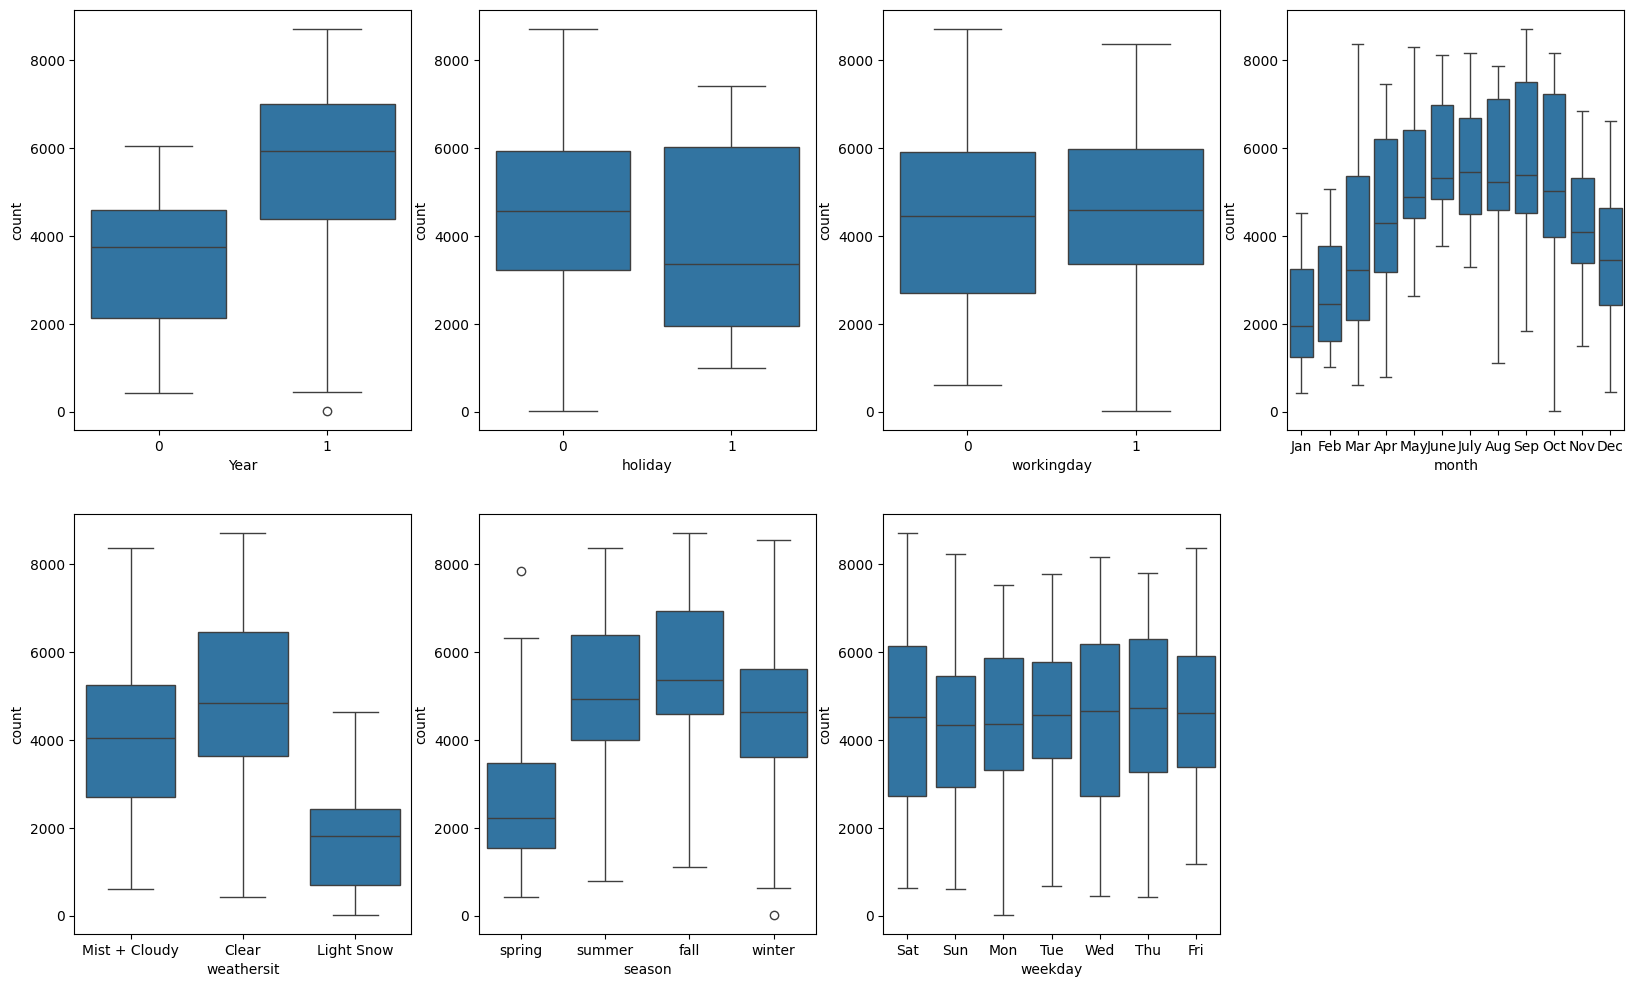

In [161]:
##Relationship between categorical and continuous variable

plt.figure(figsize=(20, 12))

plt.subplot(2,4,1)
sns.boxplot(x = 'Year', y = 'count', data = bike)

plt.subplot(2,4,2)
sns.boxplot(x = 'holiday', y = 'count', data = bike)

plt.subplot(2,4,3)
sns.boxplot(x = 'workingday', y = 'count', data = bike)

plt.subplot(2,4,4)
sns.boxplot(x = 'month', y = 'count', data = bike)

plt.subplot(2,4,5)
sns.boxplot(x = 'weathersit', y = 'count', data = bike)

plt.subplot(2,4,6)
sns.boxplot(x = 'season', y = 'count', data = bike)

plt.subplot(2,4,7)
sns.boxplot(x = 'weekday', y = 'count', data = bike)

plt.show()

Insights reveal how categorical variables are related to a target variable, in this case, bike rentals:

- Bike rentals peak:
    - during the fall season, followed by summer
    - in the year 2019 compared to 2018
    - under partly cloudy weather conditions
    - on Saturdays, Wednesdays, and Thursdays

## Univariate Analysis


#### 1: Season

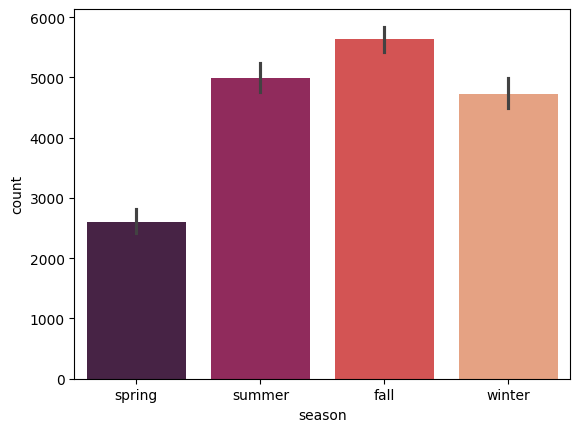

In [162]:
#Relation between season and count of bike rentals

sns.barplot(x='season',y='count',data=bike,palette="rocket")
plt.show()

#### Bike Rentals are highest in the Fall season

#### 2: Weathersit

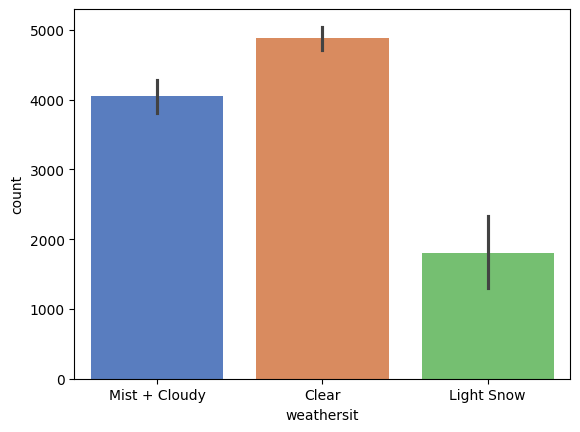

In [163]:
#Relation between weather and count of bike rentals
sns.barplot(x='weathersit',y='count',palette="muted",data=bike)
plt.show()
           

##### Bike Rentals are more in Clear weather

#### 3: Year

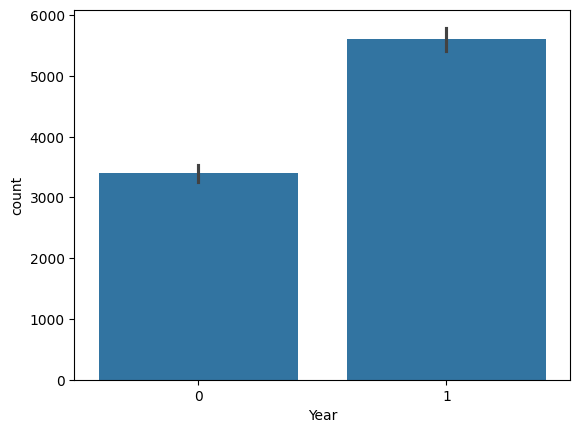

In [164]:
#Relation between Year and count of bike rentals
sns.barplot(x='Year',y='count',data=bike)
plt.show()

##### Bike rentals are higher in the year 2019 compared to 2018

#### 4: Month

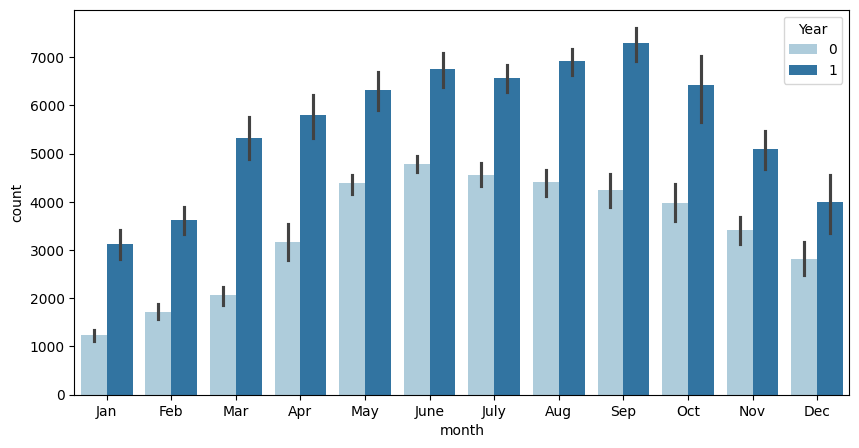

In [165]:
#Relation between month and 
plt.figure(figsize=(10,5))
sns.barplot(x='month',y='count',hue='Year',data=bike,palette='Paired')
plt.show()

##### Bike rentals are higher in the year 2019 compared to 2018

#### 5: Temperature

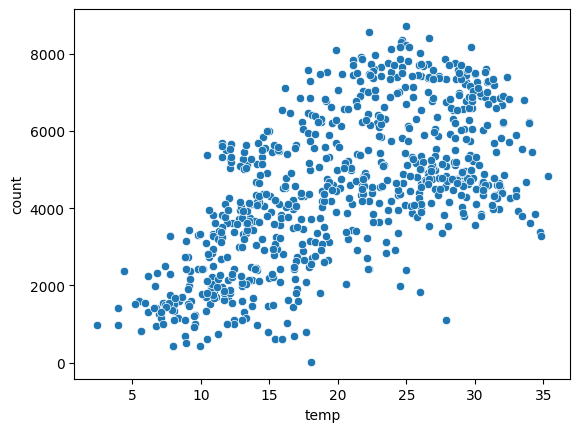

In [166]:
#scatter plot for temperature to count
sns.scatterplot(x='temp',y='count' ,data=bike)
plt.show()

##### Bike Rentals are observed at higher temperatures

#### 6: Humidity

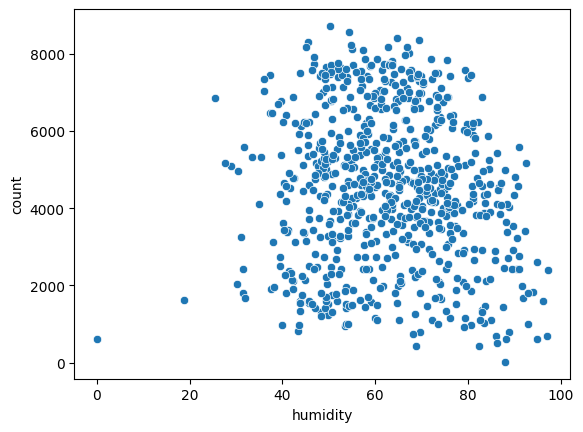

In [167]:
sns.scatterplot(x='humidity', y='count',data=bike)
plt.show()

##### Bike rentals more at high humidity

### Heatmap 

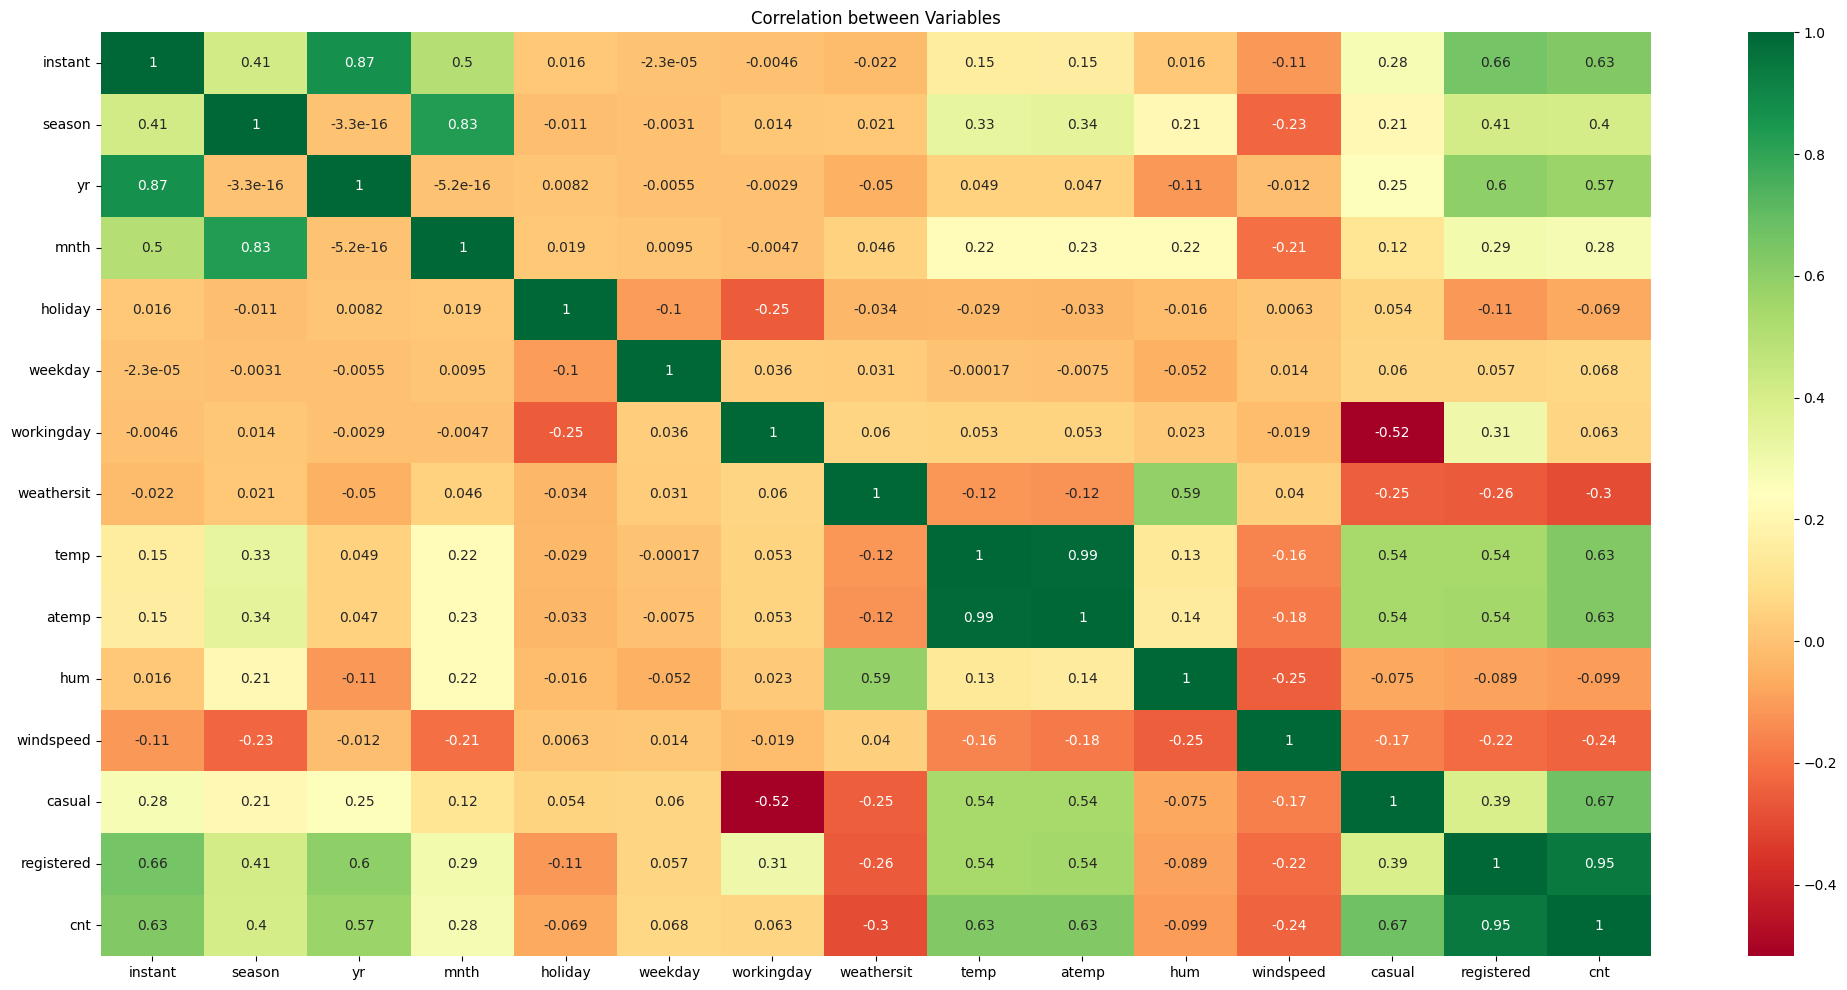

In [168]:
#Heatmap to see correlation between variables
plt.figure(figsize=(25, 12))
# Use orginal data so that heatmap function doesn't fail due to presence of strings in bike dataframe.
original_data = pd.read_csv('day.csv')
sns.heatmap(original_data.drop(['dteday'],axis=1).corr(), cmap='RdYlGn', annot = True)
plt.title("Correlation between Variables")
plt.show()

We can see temp, atemp, casual,registered,instant variables are correlated to 'cnt' variable
- We can also see some other variables are also most correlated.
- Both the plots above helps to interpret the data well and identify the variables that can turn out to be useful in building the model
- From this we can build our Linear Regression Model.

We can see the dataset has some variables that are not required. 
**We can drop instant, dteday, casual, registered**

In [169]:
#drop unnecessary columns

bike=bike.drop(['instant','dteday','casual', 'registered','atemp'], axis=1)
bike.head()

,season,Year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


### Checking the datatypes

In [170]:
#Checking datatypes of all the columns
bike.dtypes

season         object
Year            int64
month          object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
humidity      float64
windspeed     float64
count           int64
dtype: object

## Step 3: Data Preparation
### Creating Dummy variables

In [171]:
# # Dummy variables for month, season, weathersit, weekday)

months=pd.get_dummies(bike.month,drop_first=True)
weekdays=pd.get_dummies(bike.weekday,drop_first=True)
weather_sit=pd.get_dummies(bike.weathersit,drop_first=True)
seasons=pd.get_dummies(bike.season,drop_first=True)

# Combining the results to the original bike dataframe

bike=pd.concat([months,weekdays,weather_sit,seasons,bike],axis=1)
bike.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter,season,Year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


In [172]:
# Drop 'season','month','weekday','weathersit' 

bike.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

#Number of rows and columns
bike.shape

(730, 29)

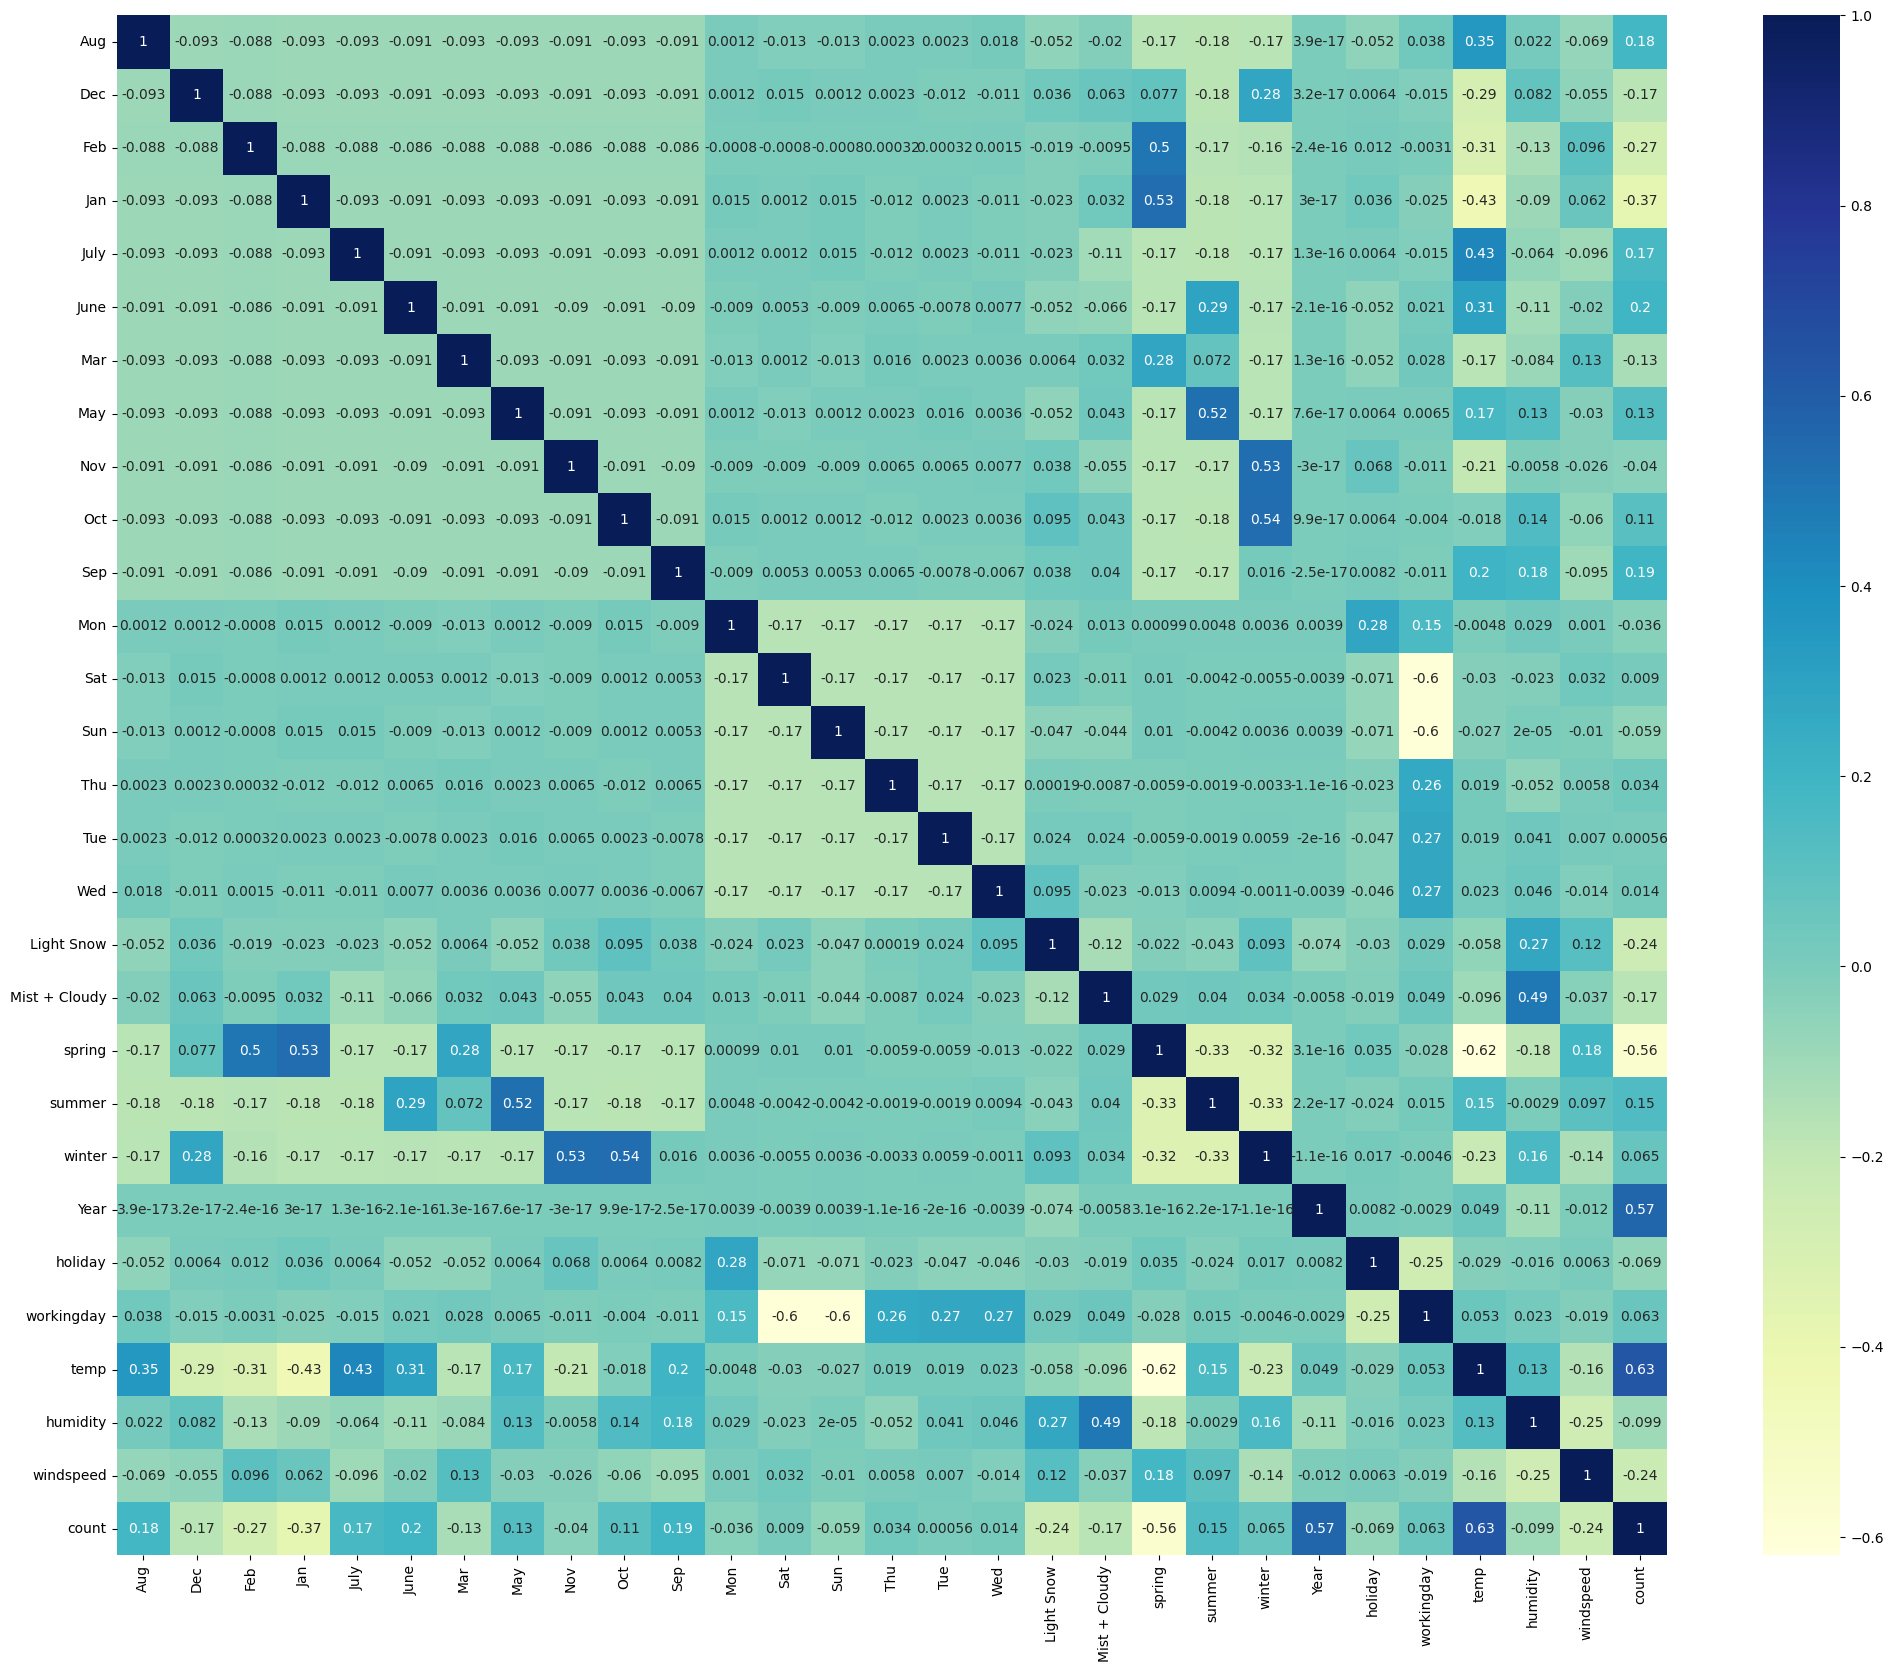

In [173]:
#Now lets check the correlation between variables again
#Heatmap to see correlation between variables

plt.figure(figsize=(25, 20))
sns.heatmap(bike.corr(), cmap='YlGnBu', annot = True)
plt.show()

Temperature,Summer season,June to october months are in good correlation with the 'count' variable & seem to have good influence on the number of bike rentals.

## Step 4: Splitting the Data - Training & Testing Sets
Before model building, you first need to perform the test-train split and scale the features.

In [174]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

bike_train, bike_test = train_test_split(bike, train_size = 0.7, random_state = 100)
#Rows and columns after split

print(bike_train.shape)
print(bike_test.shape)

(510, 29)
(220, 29)


### Rescaling the Features
It's crucial to scale all variables to the same level for straightforward model interpretation. Standardization or normalization ensures that the coefficients' units are comparable.

Here are two prevalent methods of rescaling:

- Min-Max Scaling (Normalization): Scales data between 0 and 1.
- Standardization: Adjusts data to a mean of 0 and a standard deviation of 1.

##### Min-Max scaling

In [175]:
#import the library
from sklearn.preprocessing import MinMaxScaler
#Instantiate an object
scaler = MinMaxScaler()

#Create a list of numeric variables
num_vars=['temp','humidity','windspeed','count']

#Fit on data
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])
bike_train.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,count
576,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,1,0,1,0.815169,0.725633,0.264686,0.827658
426,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,1,0,0,0.442393,0.640189,0.255342,0.465255
728,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,1,0,0,0.245101,0.498067,0.663106,0.204096
482,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,1,0,0,0.395666,0.504508,0.188475,0.482973
111,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,0,0,1,0.345824,0.751824,0.380981,0.191095


In [176]:
#Checking numeric variables(min and max) after scaling
bike_train.describe()

,Year,holiday,workingday,temp,humidity,windspeed,count
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499
std,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


All the numeric variables are now mapped between 0 and 1

Multicollinearity: Assumes that predictors are not correlated with each other. If there is
correlation among the predictors

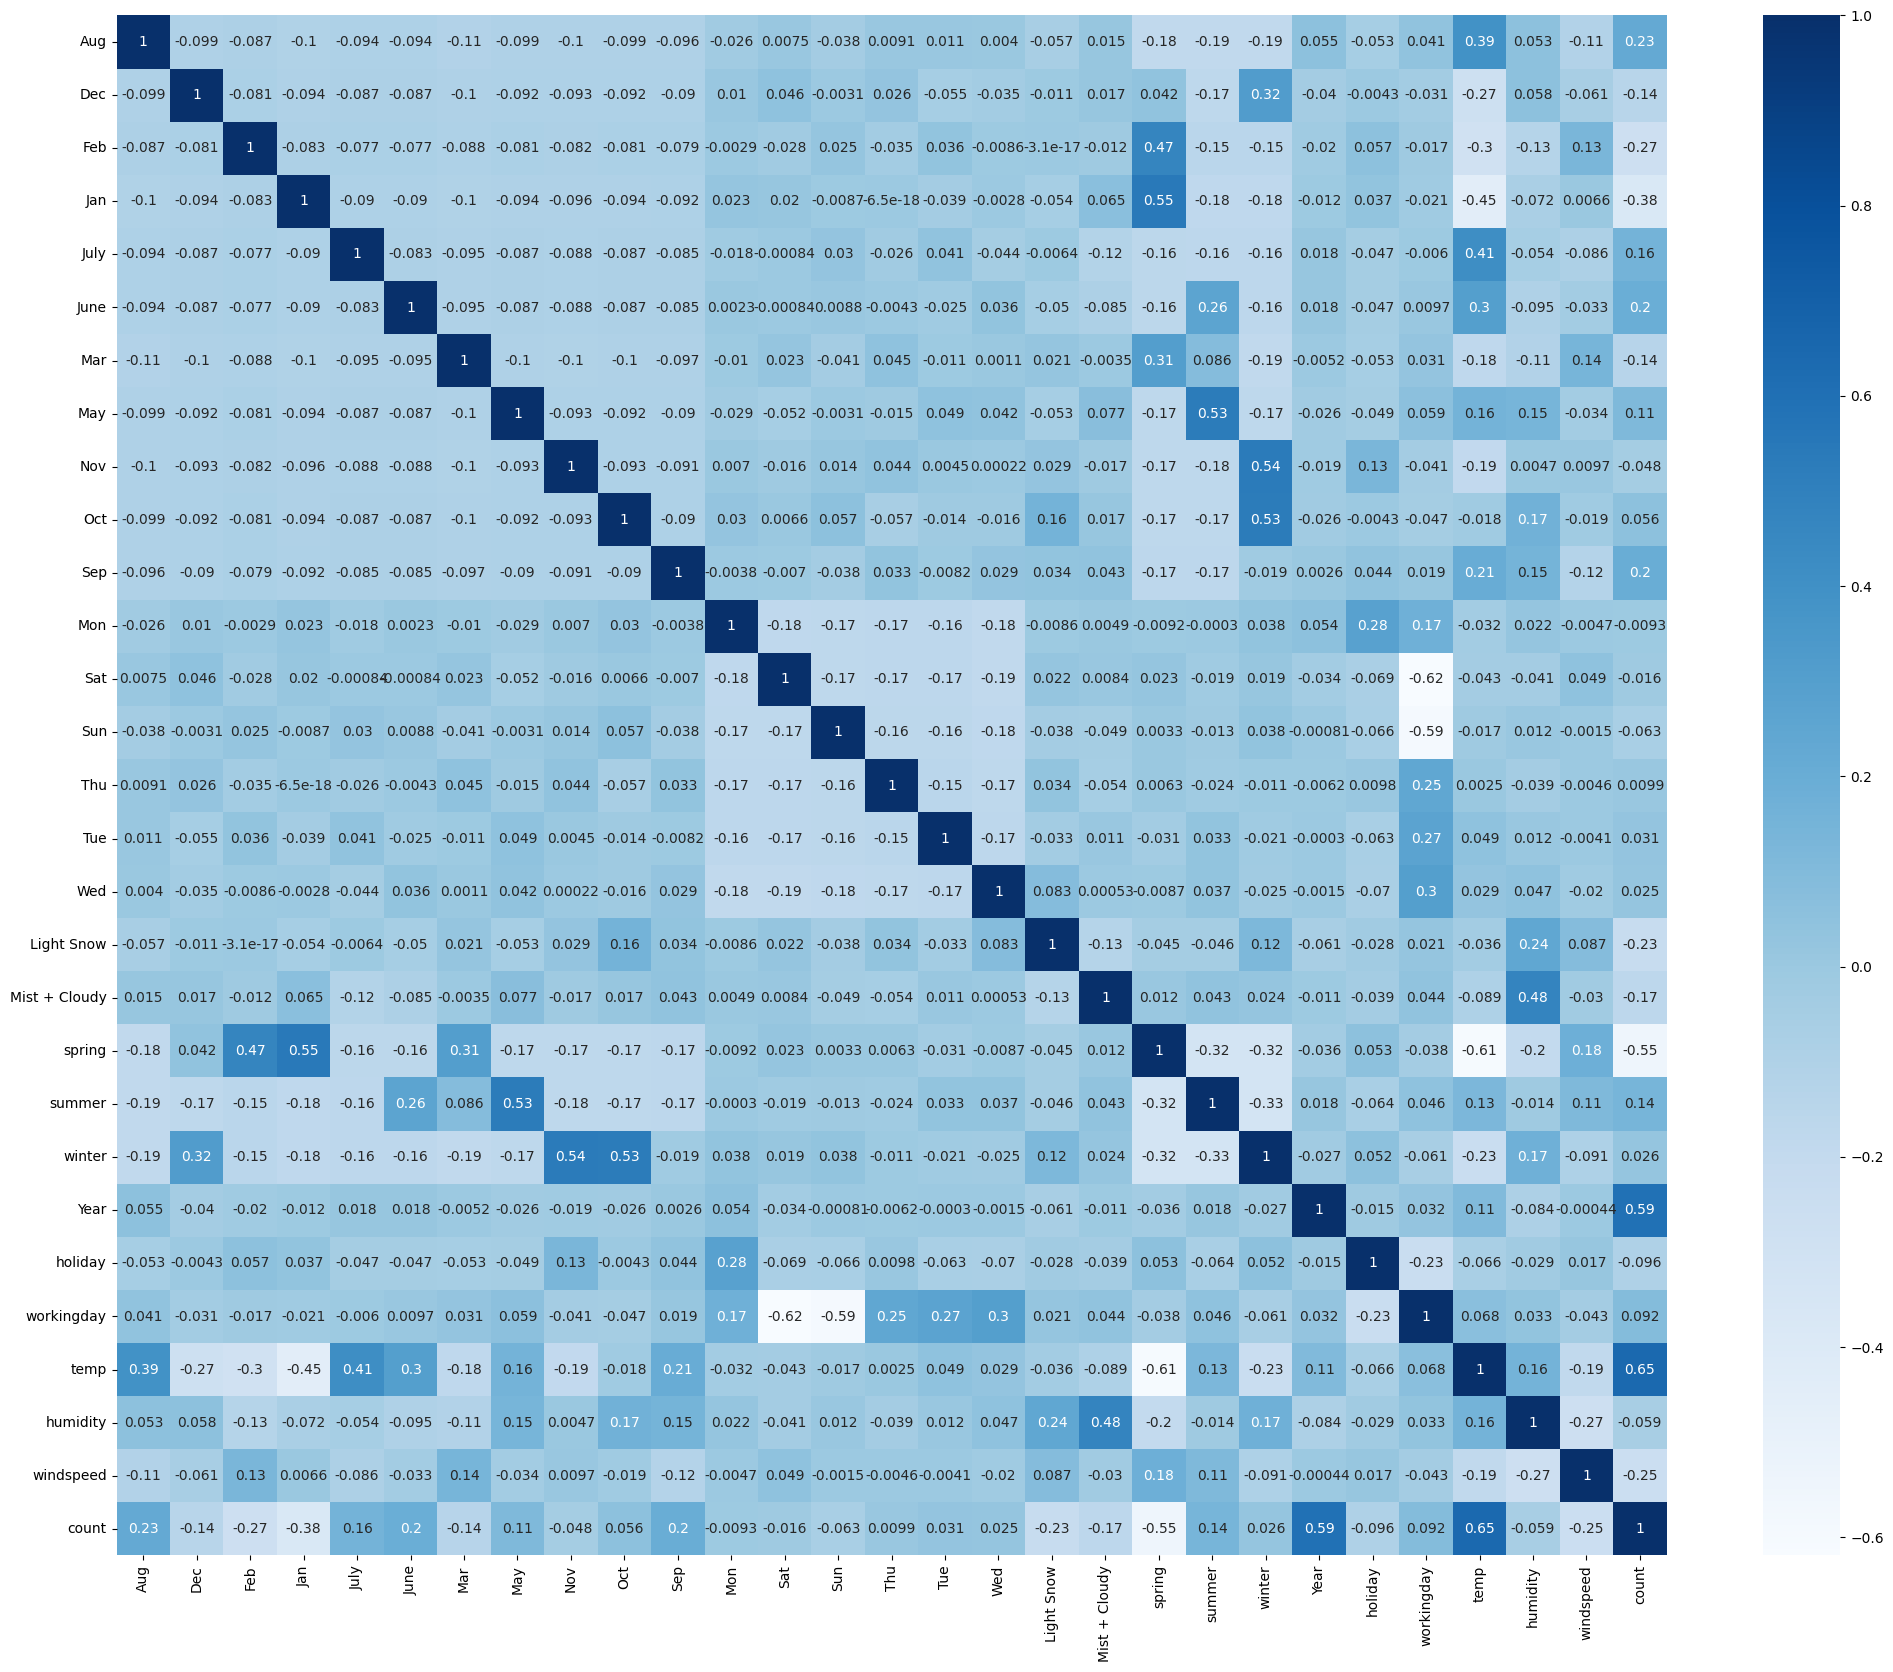

In [177]:
# Let's check the correlation coefficients to see which variables are highly correlated after scaling

plt.figure(figsize=(25, 20))
sns.heatmap(bike_train.corr(),cmap='Blues',annot = True)
plt.show()

From the heatmap we can see temp, year is correlated to the 'count' variable. Even in August, September months we can see the counts are little high.

#### Dividing into X and Y sets for the model building

In [178]:
#Divide the data into X and y
y_train = bike_train.pop('count')
X_train = bike_train

## Step 5: Building a model
### RFE **Recursive Feature Elimination**


In [179]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Running RFE with the output number of the variable equal to 15

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [180]:
#List of variables selected
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Aug', False, 7),
 ('Dec', False, 4),
 ('Feb', False, 5),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 11),
 ('Mar', False, 12),
 ('May', False, 6),
 ('Nov', False, 3),
 ('Oct', False, 13),
 ('Sep', True, 1),
 ('Mon', False, 8),
 ('Sat', True, 1),
 ('Sun', False, 2),
 ('Thu', False, 10),
 ('Tue', False, 9),
 ('Wed', False, 14),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1)]

In [181]:
#Columns where RFE support is True
col = X_train.columns[rfe.support_]
col

Index(['Jan', 'July', 'Sep', 'Sat', 'Light Snow', 'Mist + Cloudy', 'spring',
       'summer', 'winter', 'Year', 'holiday', 'workingday', 'temp', 'humidity',
       'windspeed'],
      dtype='object')

In [182]:
#Columns where RFE support is True
col = X_train.columns[rfe.support_]
col

Index(['Jan', 'July', 'Sep', 'Sat', 'Light Snow', 'Mist + Cloudy', 'spring',
       'summer', 'winter', 'Year', 'holiday', 'workingday', 'temp', 'humidity',
       'windspeed'],
      dtype='object')

### Building model using statsmodel

In [183]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

# Running the linear model 

lm = sm.OLS(y_train.astype(float), X_train_rfe.astype(float)).fit()

print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 17 Apr 2024   Prob (F-statistic):          4.22e-191
Time:                        15:50:02   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2519      0.036      6.969

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. 



In [184]:
#Drop the constant term B0
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe.astype(float)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,humidity,29.37
12,temp,17.78
11,workingday,5.31
14,windspeed,4.73
6,spring,4.53
8,winter,3.46
7,summer,2.85
5,Mist + Cloudy,2.29
9,Year,2.09
3,Sat,1.98


**January is insignificant in presence of other variables due to high p-value and low VIF; can be dropped**


In [185]:
#Drop January
X_train_new1 = X_train_rfe.drop(["Jan"], axis = 1)

##### Rebuilding the model without 'Jan'

In [186]:
#Build a model
X_train_lm1 = sm.add_constant(X_train_new1)
lm1 = sm.OLS(y_train.astype(float),X_train_lm1.astype(float)).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 17 Apr 2024   Prob (F-statistic):          2.11e-191
Time:                        15:51:08   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2402      0.036      6.714

In [187]:
#Drop the constant term B0
X_train_lm1 = X_train_lm1.drop(['const'], axis=1)
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new1.astype(float)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,humidity,28.46
11,temp,16.98
10,workingday,5.28
13,windspeed,4.72
5,spring,4.24
7,winter,3.42
6,summer,2.85
4,Mist + Cloudy,2.29
8,Year,2.08
2,Sat,1.97


**'humidity' variable can be dropped as its insignificant by looking at very high  VIF**

##### Rebuilding the model without 'humidity'

In [188]:
#Drop humidity
X_train_new2 = X_train_lm1.drop(["humidity"], axis = 1)

#Build a model
X_train_lm2 = sm.add_constant(X_train_new2)
lm2 = sm.OLS(y_train.astype(float) ,X_train_lm2.astype(float)).fit()
print(lm2.summary())



                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Wed, 17 Apr 2024   Prob (F-statistic):          1.28e-188
Time:                        15:54:08   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1576      0.031      5.126

In [189]:
#Drop the constant
X_train_lm2=X_train_lm2.drop(['const'],axis=1)

# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new2.astype(float)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,temp,6.97
10,workingday,5.20
12,windspeed,4.65
5,spring,2.49
6,summer,2.34
8,Year,2.07
7,winter,1.98
2,Sat,1.96
0,July,1.58
4,Mist + Cloudy,1.57


**Holiday variable seems to be insignificant, by looking at p value and low  VIF. We can drop it**
##### Rebuliding the model without holiday

In [190]:
#Drop the holiday column
X_train_new3=X_train_lm2.drop(['holiday'],axis=1)

# Adding a constant variable 
X_train_lm3 = sm.add_constant(X_train_new3)
lm3 = sm.OLS(y_train.astype(float), X_train_lm3.astype(float)).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.2
Date:                Wed, 17 Apr 2024   Prob (F-statistic):          7.12e-189
Time:                        15:55:28   Log-Likelihood:                 506.01
No. Observations:                 510   AIC:                            -986.0
Df Residuals:                     497   BIC:                            -931.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1492      0.031      4.881

In [191]:
#Drop constant 
X_train_lm3=X_train_lm3.drop(['const'],axis=1)

# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new3.astype(float)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,temp,6.73
9,workingday,4.66
11,windspeed,4.64
5,spring,2.38
6,summer,2.32
8,Year,2.07
7,winter,1.91
2,Sat,1.83
0,July,1.58
4,Mist + Cloudy,1.57


**Windspeed seems to be insignificant,by looking at  high VIF and negative correlation with count.  Lets drop it**
##### Rebuilding the model without windspeed

In [193]:
#Drop windspeed
X_train_new4= X_train_lm3.drop(['windspeed'], axis=1)

#Build a model
X_train_lm4=sm.add_constant(X_train_new4)
lm4=sm.OLS(y_train.astype(float), X_train_lm4.astype(float) ).fit()
print(lm4.summary())


                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     218.1
Date:                Wed, 17 Apr 2024   Prob (F-statistic):          1.94e-182
Time:                        16:02:05   Log-Likelihood:                 487.95
No. Observations:                 510   AIC:                            -951.9
Df Residuals:                     498   BIC:                            -901.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0989      0.030      3.248

In [194]:

#Drop constant
X_train_lm4= X_train_lm4.drop(['const'], axis=1)

# Calculate the VIFs for the new model
vif = pd.DataFrame()
X =X_train_new4.astype(float)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,temp,6.03
9,workingday,4.63
8,Year,2.07
6,summer,2.06
2,Sat,1.81
5,spring,1.78
7,winter,1.73
0,July,1.58
4,Mist + Cloudy,1.57
1,Sep,1.34


**July column can be dropped due to its p value and low VIF**
##### Rebuilding the model without July

In [195]:
#Drop July
X_train_new5=X_train_lm4.drop(['July'], axis=1)

#Building a model
X_train_lm5= sm.add_constant(X_train_new5)
lm5=sm.OLS(y_train.astype(float),X_train_lm5.astype(float)).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     236.7
Date:                Wed, 17 Apr 2024   Prob (F-statistic):          3.10e-182
Time:                        16:03:21   Log-Likelihood:                 484.63
No. Observations:                 510   AIC:                            -947.3
Df Residuals:                     499   BIC:                            -900.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0902      0.030      2.964

In [197]:
#Drop the constant
X_train_lm7=X_train_lm5.drop(['const'],axis=1)

# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new5.astype(float)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,temp,4.72
8,workingday,4.63
7,Year,2.07
1,Sat,1.81
5,summer,1.75
4,spring,1.70
6,winter,1.59
3,Mist + Cloudy,1.57
0,Sep,1.23
2,Light Snow,1.07


##### We now have a robust model! Both the VIFs and p-values are within acceptable limits.
##### Based on this, we can confidently proceed with making predictions using this model.

- **P-value Interpretation:** The p-value for each predictor tests the null hypothesis that the associated coefficient is zero (indicating no effect). A p-value less than 0.05 suggests that we can reject the null hypothesis.

- **Variance Inflation Factor (VIF):** A common guideline is that a VIF greater than 10 indicates high multicollinearity. However, with our VIF values all below 5, we demonstrate minimal multicollinearity, allowing us to proceed with the regression confidently.

- **R-squared Value:** R-squared measures the proportion of variance in the dependent variable explained by the independent variables in the model, expressed as a percentage from 0 to 100%. Our model has an R-squared value of 82.6%, indicating a strong relationship.

- **Adjusted R-squared:** The adjusted R-squared compensates for the number of predictors in the model to give a more accurate measure of the goodness-of-fit. Our model's adjusted R-squared is approximately 0.82 or 82%, which is very promising.

#### So our model is lm5 which is obtained by removing January, windspeed, holiday, July and humidity variables from the RFE support columns**

## Step 6: Residual Analysis of the train data
 
#### Let's check the assumpitions of Linear Regression.
 

In [199]:
#y train predicted
y_train_pred = lm5.predict(X_train_lm5)

In [198]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Figure size 640x480 with 0 Axes>

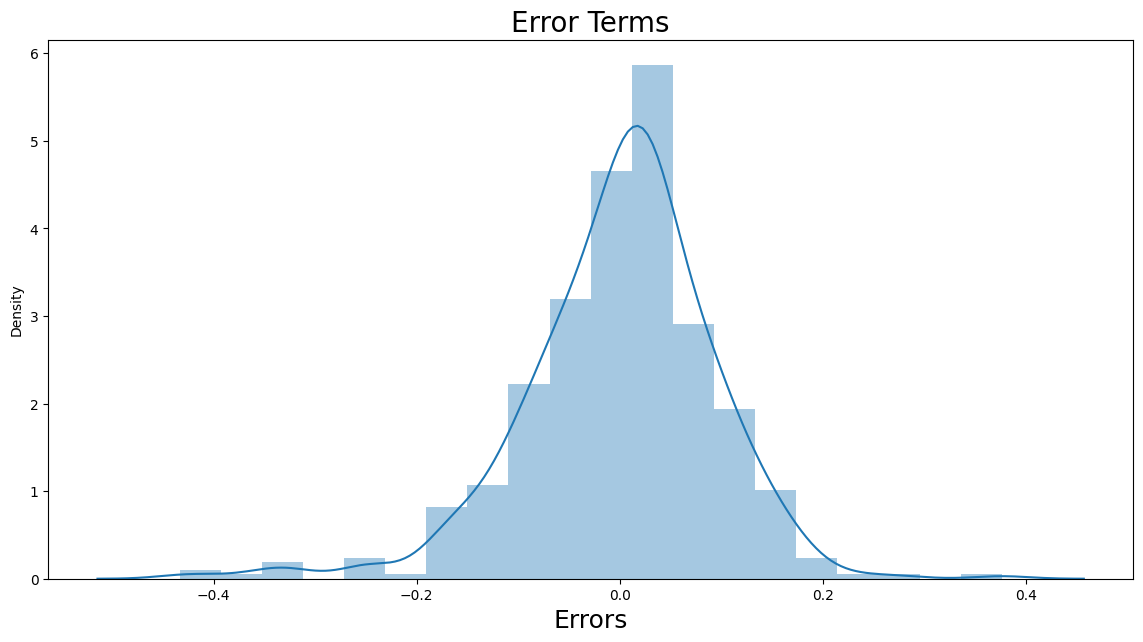

In [200]:
# Plot the histogram of the error terms

fig = plt.figure()

plt.figure(figsize=(14,7))
sns.distplot((y_train - y_train_pred), bins = 20)

plt.title('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18) 
plt.show()

**We can see Error terms are normally distributed**
## Step 7: Making Predictions
#### Applying the scaling on the test sets

In [201]:
#Create a list of numeric variables

num_vars=['temp','humidity','windspeed','count']

#Fit on data
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,count
184,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,0,1,0,0.831783,0.657364,0.084219,0.692706
535,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,1,0,1,0.901354,0.610133,0.153728,0.712034
299,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,True,0,0,1,0.511964,0.837699,0.334206,0.303382
221,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,0,0,1,0.881625,0.437098,0.339570,0.547400
152,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,0,0,1,0.817246,0.314298,0.537414,0.569029


In [202]:
#Dividing into X_test and y_test
y_test = bike_test.pop('count')
X_test = bike_test
X_test.describe()

,Year,holiday,workingday,temp,humidity,windspeed
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293
std,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474


In [204]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new5.columns]

# Adding a constant variable 
X_test_new1 = sm.add_constant(X_test_new)
print(X_test_new1.head())

# Making predictions
y_pred = lm5.predict(X_test_new1)

     const    Sep    Sat  Light Snow  Mist + Cloudy  spring  summer  winter  \
184    1.0  False  False       False           True   False   False   False   
535    1.0  False  False       False          False   False    True   False   
299    1.0  False  False       False           True   False   False    True   
221    1.0  False  False       False          False   False   False   False   
152    1.0  False  False       False          False   False    True   False   

     Year  workingday      temp  
184     0           0  0.831783  
535     1           1  0.901354  
299     0           1  0.511964  
221     0           1  0.881625  
152     0           1  0.817246  


### Finding R-squared and Adjusted R-Squared for Test set

In [206]:
#Evaluate R-square for test
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)

In [207]:
#Adjusted R^2
#adj r2=1-(1-R2)*(n-1)/(n-p-1)

#n =sample size , p = number of independent variables

Adj_r2=1-(1-score)*(11-1)/(11-1-1)
print(Adj_r2)

0.790564843560106


## Step 8: Model Evaluation

Text(0, 0.5, 'y_pred')

<Figure size 640x480 with 0 Axes>

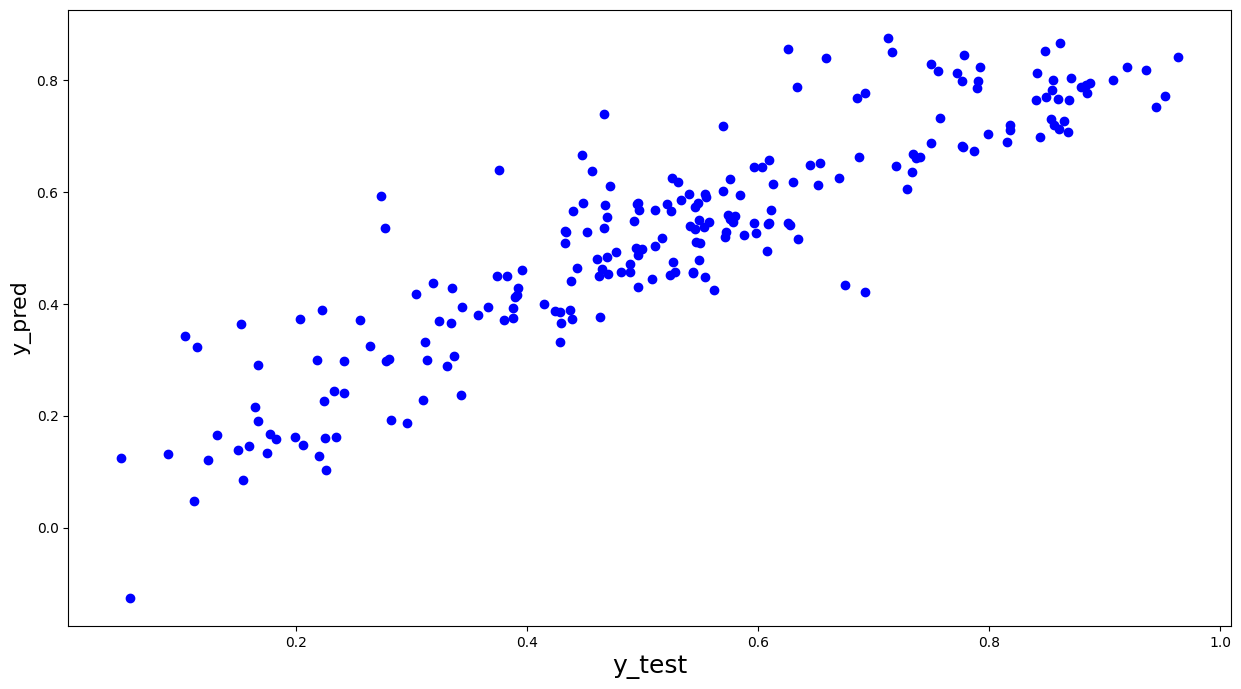

In [208]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.figure(figsize=(15,8))
plt.scatter(y_test,y_pred,color='blue')
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

##### Visualising the fit on the test set

Text(0, 0.5, 'y_pred')

<Figure size 640x480 with 0 Axes>

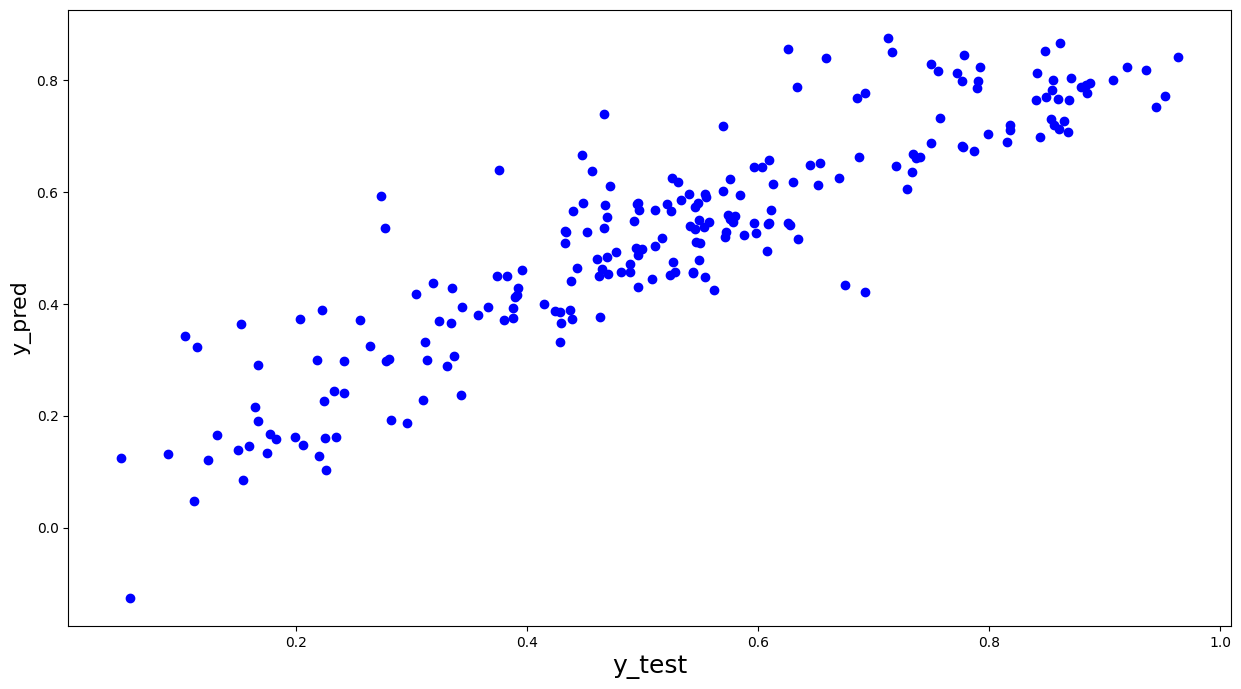

In [209]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.figure(figsize=(15,8))
plt.scatter(y_test,y_pred,color='blue')
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label


We can see that the equation of our best fitted line is:

$ count=         0.4914 \times temp+   0.0916   \times September + 0.0645 \times Saturday +0.0527 \times summer + 0.0970 \times winter + 0.2334 \times Year + 0.0566 \times working day   - 0.03041 \times light snow - 0.0786 \times mist cloudy -0.065 \times spring $

### Analysis: Comparison Between Training and Testing Models

#### - Training Model R²: 0.826
#### - Training Model Adjusted R²: 0.82

#### - Testing Model R²: 0.8115
#### - Testing Model Adjusted R²: 0.790564

#### - Difference in R² Between Training and Testing: 1.5%
#### - Difference in Adjusted R² Between Training and Testing: 3.15%

##### Since the difference in adjusted R² between the training and testing models is less than 5%, we can conclude that our model performs consistently and is thus reliable.


# Analysis on the Problem:
#### - The variable 'temperature' has the highest coefficient, at 0.4914. This indicates that an increase of one unit in temperature correlates with an increase of 0.4914 units in bike rentals.

#### - Some variables exhibit negative coefficients, suggesting that an increase in these variables leads to a decrease in the dependent variable. Variables such as 'spring', 'mist + cloudy', and 'light snow' show this negative impact.

#### - The coefficients indicate the change in the dependent variable (bike rentals) for a one-unit increase in each independent variable, holding all other variables constant.

# Business Goals:
#### - Temperature is a critical factor in decision-making for the organization, highlighting its influence on bike rental demand.

#### - An analysis of yearly data shows higher bike rental demand in 2019 compared to 2018.

#### - Working days significantly influence bike rentals. Offering promotions to working individuals could enhance business on these days.
